# Step1 : Import Librarys

In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step2 : Download Dataset

In [2]:
(train_images , train_labels), (test_images , test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Step3 : Showing the Pictures

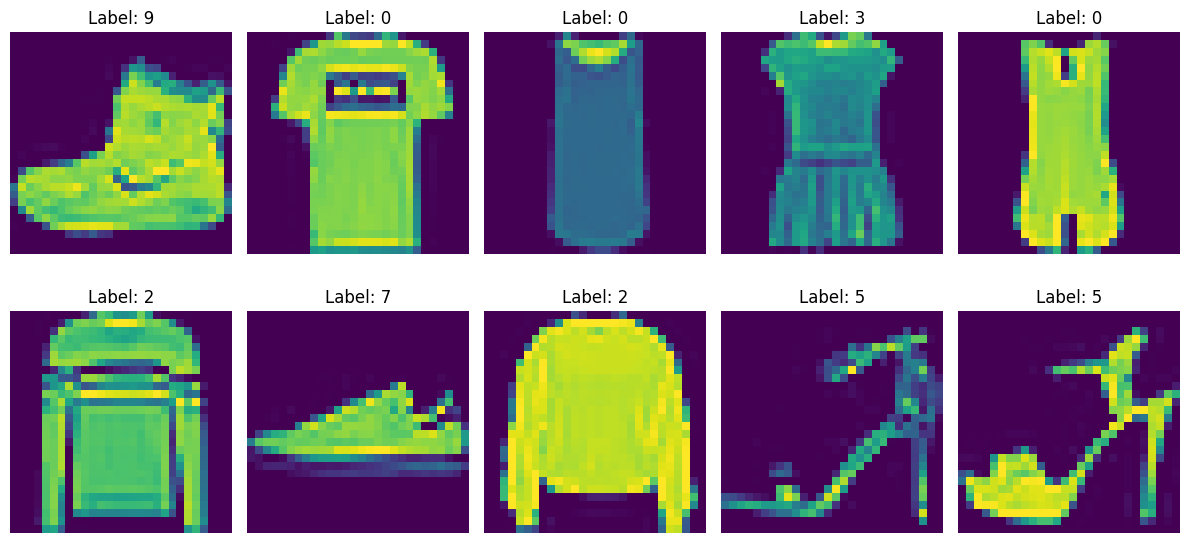

In [3]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step4 : Converting 2D data into 1D data

In [4]:
def Convert_to_1D(images):
    dataset1D = []
    for image in images:
        image1D = image.reshape(-1)
        dataset1D.append(image1D)
    dataset1D = np.array(dataset1D)
    return dataset1D

In [5]:
train_images1D = Convert_to_1D(train_images)
test_images1D = Convert_to_1D(test_images)

In [6]:
np.set_printoptions(threshold=100, edgeitems=728, linewidth=120, suppress=True)

In [7]:
print(train_images1D[0])
print("-----------------------------------------------------------------------------------------------------------------")
print(test_images1D[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0   0   0   0   0
   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0   0
   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0   0   0   0   0   0
   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0
   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127

# Step5 : Normalize dataset

In [8]:
# map data 0 to 255 values into 0 to 1
def Normalize_Image_Dataset(images):
    normImages = []
    for image in images:
        imageNorm = image / 255
        normImages.append(imageNorm)
    normImages = np.array(normImages)
    return normImages

In [9]:
train_images1DNorm = Normalize_Image_Dataset(train_images1D)
test_images1DNorm = Normalize_Image_Dataset(test_images1D)

In [10]:
print("Shape of train_images1D:", train_images1DNorm[0])
print("Shape of test_images1D:", test_images1DNorm[0])

Shape of train_images1D: [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

# Step6 : Standarize Dataset

In [11]:
def Standardize_Image_Dataset(Dataset):
    scaler = StandardScaler()
    return scaler.fit_transform(Dataset)

In [12]:
train_images_scaled = Normalize_Image_Dataset(train_images1DNorm)
test_images_scaled = Normalize_Image_Dataset(test_images1DNorm)

# Step7 : Redeuce Dimension with LDA

In [13]:
def Reduce_Dimensions_LDA(Data, Labels, Dimensions):
    reduced_data = {}
    for dimension in Dimensions:
        lda = LDA(n_components=dimension)
        data_reduced = lda.fit_transform(Data, Labels)
        reduced_data[dimension] = data_reduced
    return reduced_data

In [14]:
lda_dimensions = [2, 3, 5, 7, 9]
reduced_trainset_dict_lda = Reduce_Dimensions_LDA(train_images_scaled, train_labels, lda_dimensions)
reduced_testset_dict_lda = Reduce_Dimensions_LDA(test_images_scaled, test_labels, lda_dimensions)

In [15]:
print(reduced_trainset_dict_lda[9])

[[  7.62390709  -2.35651495   1.86879822  -3.86992576   0.19135115   0.49837075  -0.45417638   0.20182621  -0.9907628 ]
 [ -2.03265124   2.19354509   2.04421033   0.36255512  -2.73342617  -4.82387242  -0.51466133  -0.33564963   2.69387667]
 [ -1.86309439  -0.16940596   0.96932084   0.40686173  -0.93593709   0.14359669   0.12462662   0.27503281  -0.14953663]
 [ -2.65712704   0.57703515   1.55700709   0.72176563  -0.81339499   0.03821152  -0.10025019  -1.43274229  -1.78754245]
 [ -3.41059001  -2.01569897   0.52725782   0.58115788  -1.99888386   0.74576782   0.13216183   1.02478922  -0.68891028]
 [ -2.21735485   1.75255996   0.70259136  -0.34022923   1.75913523   0.31265065   0.18485594  -4.4074609    0.29452216]
 [  5.28702532  -0.82765153  -0.67689201   3.11432194   0.53303305  -0.02443311  -0.64542123   0.26590659   0.05343167]
 [ -2.09773504   2.0571351    0.52506142  -0.9203656    3.67622444   0.82867993  -1.14416969  -3.56059013   0.47178956]
 [  2.85443121   0.37096879   0.58728754

# Step8 : Redeuce Dimension with PCA

In [16]:
def Reduce_Dimensions_PCA(Data, Dimensions):
    reduced_data = {}
    for dimension in Dimensions:
        pca = PCA(n_components=dimension)
        data_reduced = pca.fit_transform(Data)
        reduced_data[dimension] = data_reduced
    return reduced_data

In [17]:
pca_dimensions = [2, 3, 5, 7, 9, 25, 50, 100, 200, 300]
reduced_trainset_dict_pca = Reduce_Dimensions_PCA(train_images_scaled, pca_dimensions)
reduced_testset_dict_pca = Reduce_Dimensions_PCA(test_images_scaled, pca_dimensions)

# Step9 : Split dataset for K-Fold Cross-validation

In [18]:
def Split_Dataset_Cross_validation(Dataset, Labels, K):
    cross_validation_pack = []
    split_Dataset = np.array_split(Dataset, K)
    split_Label = np.array_split(Labels, K)
    for k in range(K):
        temp = []
        trainset_parts = []
        trainLabel_parts = []
        testset = split_Dataset[k]
        testLabel = split_Label[k]
        for i in range(K):
            if i != k:
                trainset_parts.append(split_Dataset[i])
                trainLabel_parts.append(split_Label[i])
        trainset = np.concatenate(trainset_parts)
        trainLabel = np.concatenate(trainLabel_parts)
        temp.append(trainset)
        temp.append(testset)
        temp.append(trainLabel)
        temp.append(testLabel)
        cross_validation_pack.append(temp)
    return cross_validation_pack

In [19]:
label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
new = Split_Dataset_Cross_validation(data, label, 5)
print(len(new))

5


In [20]:
lda_cross_pack_dict = {}
for dimension in lda_dimensions:
    lda_cross_pack_dict[dimension] = Split_Dataset_Cross_validation(reduced_trainset_dict_lda[dimension], train_labels, 5)

pca_cross_pack_dict = {}
for dimension in pca_dimensions:
    pca_cross_pack_dict[dimension] = Split_Dataset_Cross_validation(reduced_trainset_dict_pca[dimension], train_labels, 5)

# Step10 : Training LDA Dataset with Perseptron Classification

In [21]:
def Classification_Perseptron_5Fold_LDA(Epochs, LDA_Dimensions, LDA_Cross_Pack_Dict):
    accuracy_dict = {}
    model_list = []
    for dimension in LDA_Dimensions:
        perceptron = Perceptron(max_iter=1, random_state=42, warm_start=True)
        epoch_train_accuracy = []
        for Epoch in range(Epochs):
            part = Epochs % 5
            train_data = LDA_Cross_Pack_Dict[dimension][part][0]
            train_label = LDA_Cross_Pack_Dict[dimension][part][2]

            perceptron.fit(train_data, train_label)

            train_label_predicted = perceptron.predict(train_data)
            train_accuracy = accuracy_score(train_label, train_label_predicted)
            epoch_train_accuracy.append(train_accuracy)

        accuracy_dict[dimension] = epoch_train_accuracy
        model_list.append(perceptron)
    return accuracy_dict, model_list

In [22]:
lda_accuracy, lda_models  = Classification_Perseptron_5Fold_LDA(10, lda_dimensions, lda_cross_pack_dict)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

# Step11 : Training PCA Dataset with Perseptron Classification

In [23]:
def Classification_Perseptron_5Fold_PCA(Epochs, PCA_Dimensions, PCA_Cross_Pack_Dict):
    accuracy_dict = {}
    model_list = []
    for dimension in PCA_Dimensions:
        perceptron = Perceptron(max_iter=1, random_state=42, warm_start=True)
        epoch_train_accuracy = []
        for Epoch in range(Epochs):
            part = Epochs % 5
            train_data = PCA_Cross_Pack_Dict[dimension][part][0]
            train_label = PCA_Cross_Pack_Dict[dimension][part][2]

            perceptron.fit(train_data, train_label)

            train_label_predicted = perceptron.predict(train_data)
            train_accuracy = accuracy_score(train_label, train_label_predicted)
            epoch_train_accuracy.append(train_accuracy)

        accuracy_dict[dimension] = epoch_train_accuracy
        model_list.append(perceptron)
    return accuracy_dict, model_list

In [24]:
pca_accuracy, pca_models = Classification_Perseptron_5Fold_PCA(10, pca_dimensions, pca_cross_pack_dict)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

# Step12 : Showing LDA Accuracy with Boxplot

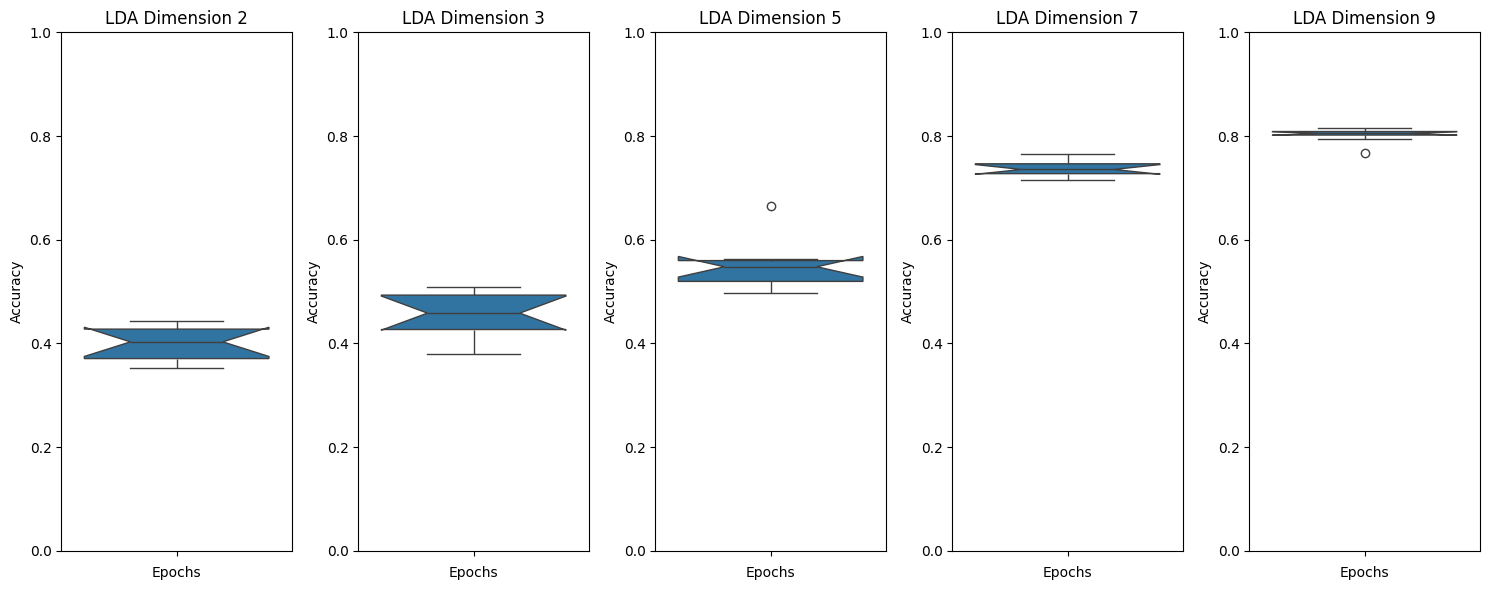

In [25]:
num_dimensions = len(lda_accuracy)
fig, axes = plt.subplots(1, num_dimensions, figsize=(15, 6))

for i, (dimension, train_accuracies) in enumerate(lda_accuracy.items()):
    sns.boxplot(data=train_accuracies, notch=True, ax=axes[i])
    axes[i].set_title(f'LDA Dimension {dimension}')
    axes[i].set_ylabel('Accuracy')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Step13 : Showing LDA Accuracy with Boxplot

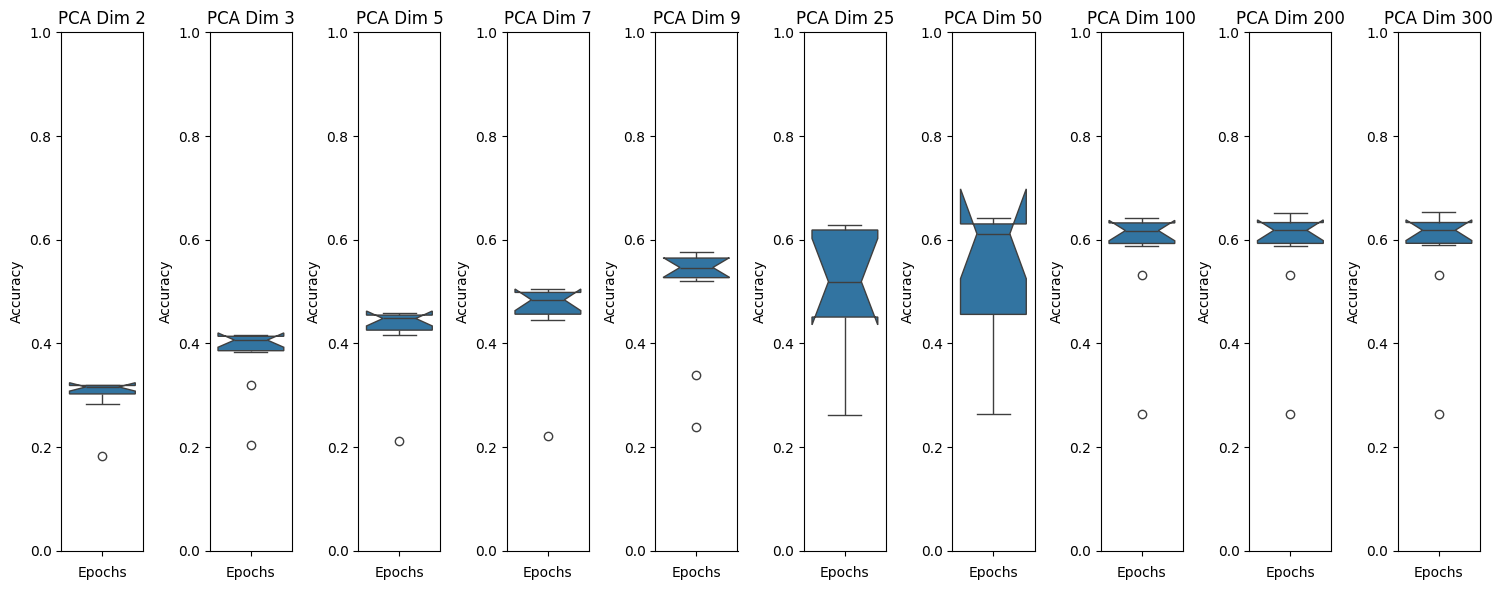

In [26]:
num_dimensions = len(pca_accuracy)
fig, axes = plt.subplots(1, num_dimensions, figsize=(15, 6))

for i, (dimension, train_accuracies) in enumerate(pca_accuracy.items()):
    sns.boxplot(data=train_accuracies, notch=True, ax=axes[i])
    axes[i].set_title(f'PCA Dim {dimension}')
    axes[i].set_ylabel('Accuracy')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Step14 : Testing LDA Dataset with Perseptron Classification

In [27]:
def Classification_Perseptron_5Fold_LDA_Test(LDA_Model, LDA_Dimensions, Reduced_Testset_Dict_Lda, Test_Labels):
    Test_Accuracy = []
    for dimension in LDA_Dimensions:
        Test_Images = Reduced_Testset_Dict_Lda[dimension]
        test_label_predicted = LDA_Model[LDA_Dimensions.index(dimension)].predict(Test_Images)
        test_accuracy = accuracy_score(Test_Labels, test_label_predicted)
        Test_Accuracy.append(test_accuracy)
    return Test_Accuracy

In [28]:
lda_test_accuracy = Classification_Perseptron_5Fold_LDA_Test(lda_models, lda_dimensions, reduced_testset_dict_lda, test_labels)

In [29]:
lda_test_accuracy

[0.4328, 0.4727, 0.6483, 0.5866, 0.6368]

# Step15 : Testing PCA Dataset with Perseptron Classification

In [30]:
def Classification_Perseptron_5Fold_PCA_Test(PCA_Model, PCA_Dimensions, Reduced_Testset_Dict_PCA, Test_Labels):
    Test_Accuracy = []
    for dimension in PCA_Dimensions:
        Test_Images = Reduced_Testset_Dict_PCA[dimension]
        test_label_predicted = PCA_Model[PCA_Dimensions.index(dimension)].predict(Test_Images)
        test_accuracy = accuracy_score(Test_Labels, test_label_predicted)
        Test_Accuracy.append(test_accuracy)
    return Test_Accuracy

In [31]:
pca_test_accuracy = Classification_Perseptron_5Fold_PCA_Test(pca_models, pca_dimensions, reduced_testset_dict_pca, test_labels)

In [32]:
pca_test_accuracy

[0.3053, 0.4125, 0.4459, 0.429, 0.4494, 0.4566, 0.4478, 0.442, 0.4536, 0.4533]

# Step16 : Calculate Mean Accuracy For Training set

In [33]:
def Calculate_Mean_Accuracy(Accuracy, Dimensions):
    accuracy = []
    for dimension in Dimensions:
        accuracy.append(sum(Accuracy[dimension]) / len(Accuracy[dimension]))
    return accuracy

In [34]:
lda_train_accuracy = Calculate_Mean_Accuracy(lda_accuracy, lda_dimensions)
pca_train_accuracy = Calculate_Mean_Accuracy(pca_accuracy, pca_dimensions)

# Step17 : Calculate Overfitting and Underfitting

In [35]:
def Calculate_Overfitting_Underfitting(Dimension, Train_Accuracy, Test_Accuracy):
    Dimension = np.array(Dimension)
    Train_Accuracy = np.array(Train_Accuracy)
    Test_Accuracy = np.array(Test_Accuracy)

    Diff_Accuracy = Train_Accuracy - Test_Accuracy
    Overfitting_Threshold = 0.1

    Results = pd.DataFrame({
        'Dimension': Dimension,
        'Train Accuracy': Train_Accuracy,
        'Test Accuracy': Test_Accuracy,
        'Difference': Diff_Accuracy,
        'Analysis': ['Overfitting' if diff > Overfitting_Threshold else
                    'Underfitting' if train < 50 and test < 50 else
                    'Balanced'
                    for diff, train, test in zip(Diff_Accuracy, Train_Accuracy, Test_Accuracy)]
    })
    return Results

In [36]:
lda_results = Calculate_Overfitting_Underfitting(lda_dimensions, lda_train_accuracy, lda_test_accuracy)

In [37]:
lda_results

,Dimension,Train Accuracy,Test Accuracy,Difference,Analysis
0,2,0.399438,0.4328,-0.033363,Underfitting
1,3,0.456765,0.4727,-0.015935,Underfitting
2,5,0.549644,0.6483,-0.098656,Underfitting
3,7,0.736610,0.5866,0.150010,Overfitting
4,9,0.801779,0.6368,0.164979,Overfitting


In [38]:
pca_results = Calculate_Overfitting_Underfitting(pca_dimensions, pca_train_accuracy, pca_test_accuracy)

In [39]:
pca_results

,Dimension,Train Accuracy,Test Accuracy,Difference,Analysis
0,2,0.297956,0.3053,-0.007344,Underfitting
1,3,0.377298,0.4125,-0.035202,Underfitting
2,5,0.419883,0.4459,-0.026017,Underfitting
3,7,0.455085,0.4290,0.026085,Underfitting
4,9,0.500852,0.4494,0.051452,Underfitting
5,25,0.510133,0.4566,0.053533,Underfitting
6,50,0.534513,0.4478,0.086713,Underfitting
7,100,0.577119,0.4420,0.135119,Overfitting
8,200,0.578571,0.4536,0.124971,Overfitting
9,300,0.578656,0.4533,0.125356,Overfitting


# Step18 : Choosing Best LDA Model

In [40]:
def Choose_Best_LDA_Model(LDA_Dimensions, LDA_Accuracy, LDA_Models):
    temp = 0
    Mean = 0
    dim = 0
    for dimension in LDA_Dimensions:
        temp = (sum(LDA_Accuracy[dimension]) / len(LDA_Accuracy[dimension]))
        if  Mean < temp:
            dim = dimension
            Mean = temp
    print("Dimension Selcted : " + str(dim))
    return LDA_Models[LDA_Dimensions.index(dim)], dim

In [41]:
best_lda_model, best_lda_dim = Choose_Best_LDA_Model(lda_dimensions, lda_accuracy, lda_models)

Dimension Selcted : 9


# Step19 : Choosing Best PCA Model

In [42]:
def Choose_Best_PCA_Model(PCA_Dimensions, PCA_Accuracy, PCA_Models):
    temp = 0
    Mean = 0
    dim = 0
    for dimension in PCA_Dimensions:
        temp = (sum(PCA_Accuracy[dimension]) / len(PCA_Accuracy[dimension]))
        if  Mean < temp:
            dim = dimension
            Mean = temp
    print("Dimension Selcted : " + str(dim))
    return PCA_Models[PCA_Dimensions.index(dim)], dim

In [43]:
best_pca_model, best_pca_dim = Choose_Best_PCA_Model(pca_dimensions, pca_accuracy, pca_models)

Dimension Selcted : 300


# Step20 : Testing LDA Dataset with Best Perseptron Classification Model

In [52]:
def Classification_Perseptron_5Fold_LDA_Test(Model, Test_Images, Test_Labels):
    test_label_predicted = Model.predict(Test_Images)
    test_accuracy = accuracy_score(Test_Labels, test_label_predicted)
    return test_accuracy, test_label_predicted

In [53]:
best_lda_accuracy, lda_test_label_predicted = Classification_Perseptron_5Fold_LDA_Test(best_lda_model, reduced_testset_dict_lda[best_lda_dim], test_labels)

In [54]:
best_lda_accuracy

0.6368

# Step21 : Testing PCA Dataset with Best Perseptron Classification Model

In [55]:
def Classification_Perseptron_5Fold_PCA_Test(Model, Test_Images, Test_Labels):
    test_label_predicted = Model.predict(Test_Images)
    test_accuracy = accuracy_score(Test_Labels, test_label_predicted)
    return test_accuracy, test_label_predicted

In [56]:
best_pca_accuracy, pca_test_label_predicted = Classification_Perseptron_5Fold_PCA_Test(best_pca_model, reduced_testset_dict_pca[best_pca_dim], test_labels)

In [57]:
best_pca_accuracy

0.4533

# Step22 : Calculating Confusion Matrix

In [64]:
def Calculate_Confusion_Matrix(test_labels, lda_test_label_predicted, best_lda_model):
    Confusion_Matrix = confusion_matrix(test_labels, lda_test_label_predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_Matrix, display_labels=best_lda_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
    return Confusion_Matrix

# Step23 : Showing LDA Confusion Matrix

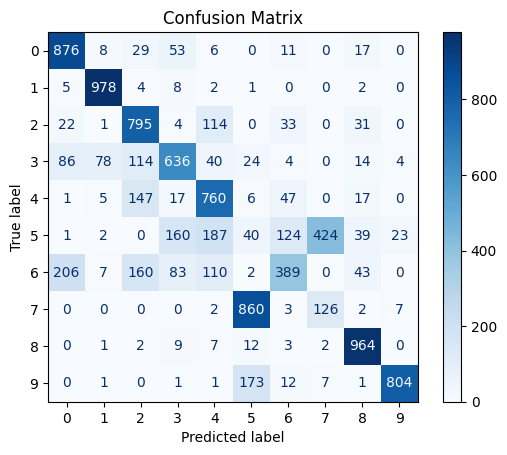

In [66]:
lda_confusion_matrix = Calculate_Confusion_Matrix(test_labels, lda_test_label_predicted, best_lda_model)

# Step24 : Showing PCA Confusion Matrix

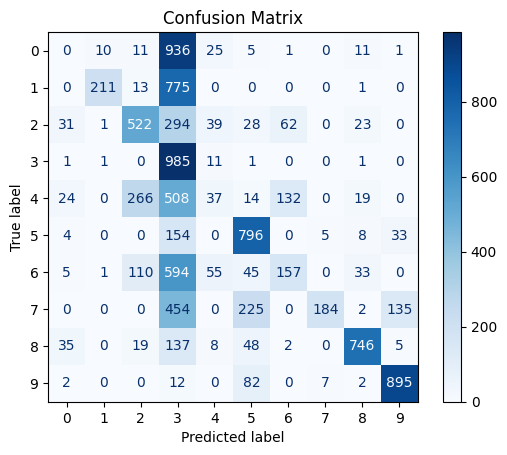

In [67]:
pca_confusion_matrix = Calculate_Confusion_Matrix(test_labels, pca_test_label_predicted, best_pca_model)